# Predict Future Sales

The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
sns.set_context('notebook')
sns.set_style('whitegrid')

### Load data

In [6]:
train = pd.read_csv('data/sales_train.csv')
test = pd.read_csv('data/test.csv')
items = pd.read_csv('data/items.csv')
categories = pd.read_csv('data/item_categories.csv')
train.shape, test.shape

((2935849, 6), (214200, 3))

In [7]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [8]:
train['date'] = pd.to_datetime(train['date'])

Adding items names and categories from other csv to the train data

In [26]:
#items_cat = items.merge(categories, on='item_category_id')
#items_cat.head()

We have to predict sales for November, so we need to arrange them by months

In [10]:
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [17]:
monthly = train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day':'sum', 'date':['min', 'max'], 'item_price':'mean'})

In [18]:
monthly.head(10)

item_cnt_day       date            item_price
                                        sum        min        max       mean
date_block_num shop_id item_id                                              
0              0       32               6.0 2013-01-21 2013-03-01      221.0
                       33               3.0 2013-01-17 2013-03-01      347.0
                       35               1.0 2013-01-31 2013-01-31      247.0
                       43               1.0 2013-01-31 2013-01-31      221.0
                       51               2.0 2013-01-13 2013-01-31      128.5
                       61               1.0 2013-10-01 2013-10-01      195.0
                       75               1.0 2013-01-17 2013-01-17       76.0
                       88               1.0 2013-01-16 2013-01-16       76.0
                       95               1.0 2013-06-01 2013-06-01      193.0
                       96               1.0 2013-10-01 2013-10-01       70.0

Let's look the item categories

In [36]:
# items per category
by_category = items.groupby('item_category_id').count()
by_category

,item_name,item_id
item_category_id,,
0,4,4
1,2,2
2,75,75
3,34,34
4,15,15
...,...,...
79,1,1
80,6,6
81,7,7


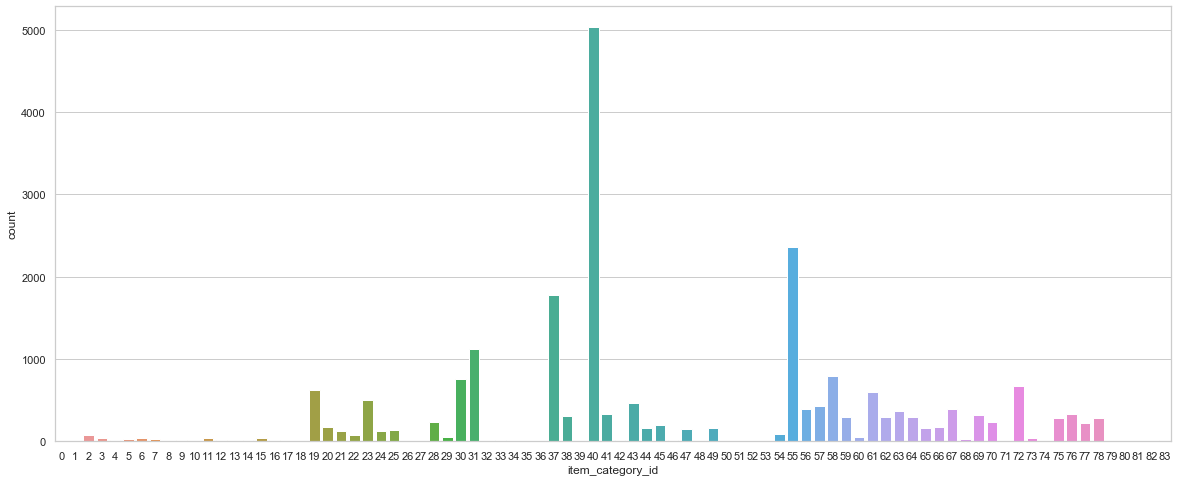

In [57]:
plt.figure(figsize=(20,8))
sns.countplot(items['item_category_id'].sort_values());

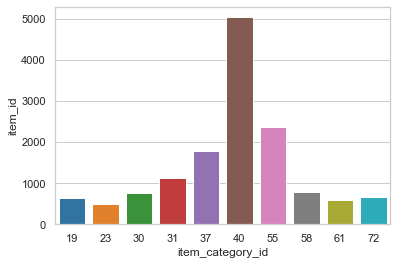

In [58]:
# top 10 categories
top10 = by_category.sort_values('item_id', ascending=False).head(10)
sns.barplot(top10.index, top10['item_id']);

Total Sales by month

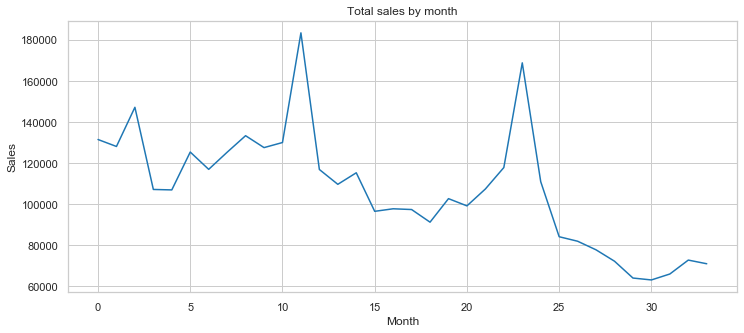

In [76]:
total_sales = train.groupby('date_block_num')['item_cnt_day'].sum()
plt.figure(figsize=(12,5));
plt.title('Total sales by month');
plt.xlabel('Month');
plt.ylabel('Sales');
plt.plot(total_sales.index, total_sales);


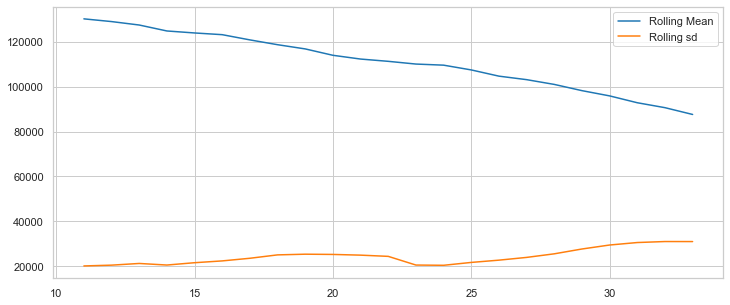

In [78]:
plt.figure(figsize=(12,5));

plt.plot(total_sales.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(total_sales.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

* There is a decreasing trend
* There is a obvius seasonality, sales peak around a time of the year